In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import mglearn as mglearn

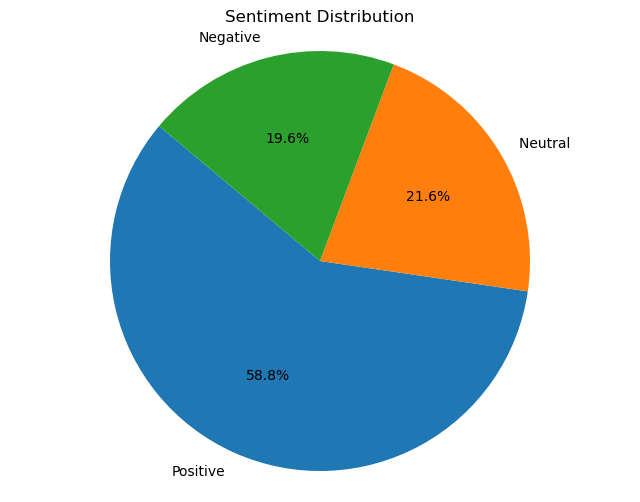

In [2]:
new_df = pd.read_csv('final_comments_df.csv')

sentiment_distribution = new_df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

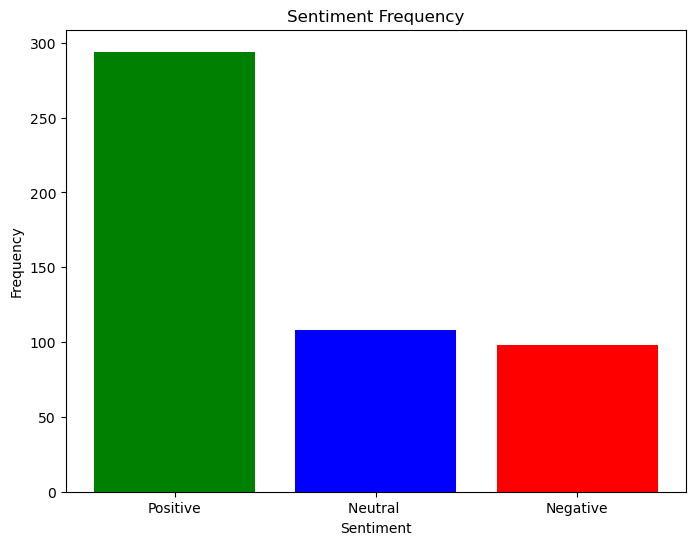

In [3]:
plt.figure(figsize=(8, 6))
plt.bar(sentiment_distribution.index, sentiment_distribution.values, color=['green','blue', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Frequency')
plt.show()


(-0.5, 799.5, 399.5, -0.5)

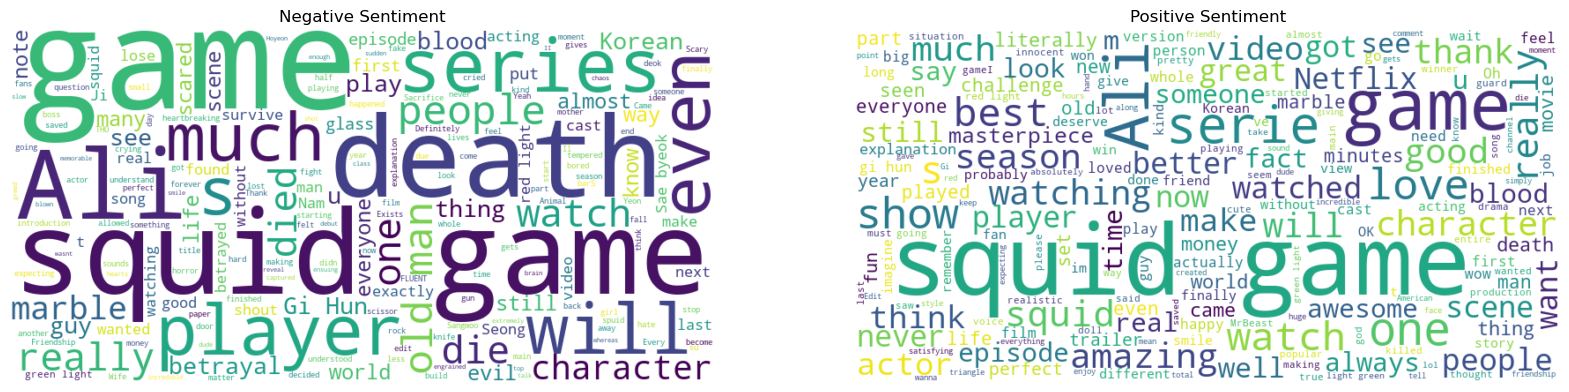

In [4]:
positive = ''.join(new_df[new_df['sentiment'] == 'Positive']['c_text'])
negative = ''.join(new_df[new_df['sentiment'] == 'Negative']['c_text'])

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Sentiment')
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.axis('off')

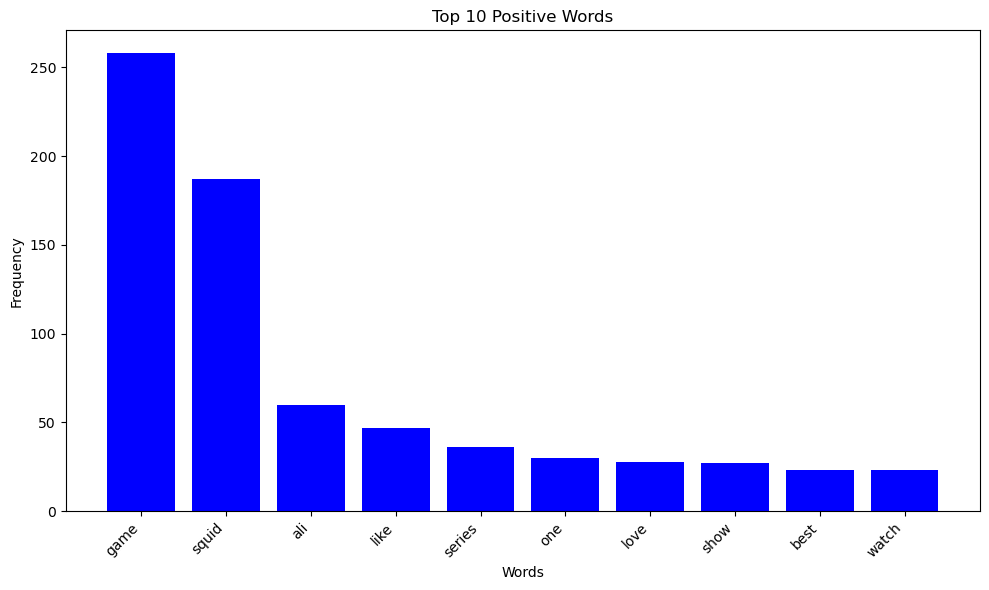

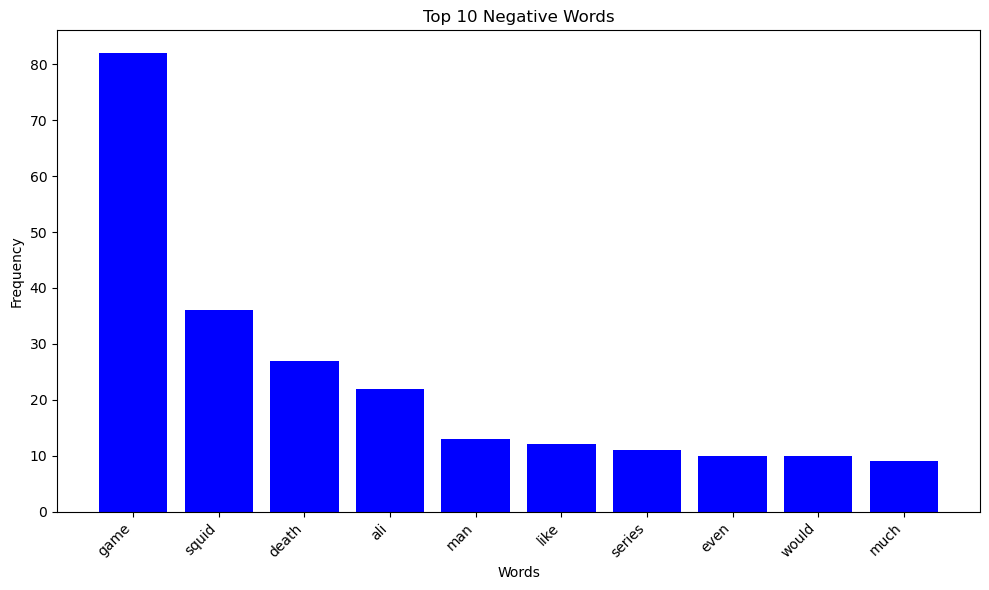

In [5]:
# sentiments = new_df['sentiment']
# texts = new_df['c_text']

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    # Filter out stopwords and punctuation
    tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    return tokens

new_df['processed_text'] = new_df['c_text'].apply(preprocess_text)

positive_word_freq = {}
negative_word_freq = {}

# get word and udpdate frequency depending on the sentiment
for i, row in new_df.iterrows():
    sentiment = row['sentiment']
    for word in row['processed_text']:
        if sentiment == 'Positive':
            positive_word_freq[word] = positive_word_freq.get(word, 0) + 1
        elif sentiment == 'Negative':
            negative_word_freq[word] = negative_word_freq.get(word, 0) + 1

# sort values from dict and get top 10
top_10_positive_words = sorted(positive_word_freq.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_negative_words = sorted(negative_word_freq.items(), key=lambda x: x[1], reverse=True)[:10]

# plot graphs
def plot_top_words(top_words, title):
    words, frequencies = zip(*top_words)
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies, color='blue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_top_words(top_10_positive_words, 'Top 10 Positive Words')
plot_top_words(top_10_negative_words, 'Top 10 Negative Words')



In [6]:
#Seperating positive and negative comments
pos_df = new_df[new_df['sentiment'] == 'Positive']['c_text']
neg_df = new_df[new_df['sentiment'] == 'Negative']['c_text']

In [7]:
# Removing words that occur 15% of comments
vectorizer = CountVectorizer(max_features=10000, max_df=.15)
X_pos = vectorizer.fit_transform(pos_df)

In [8]:
# Learning 10 topics
lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
                                max_iter=25, random_state=0)
pos_comment_topics = lda.fit_transform(X_pos)

In [9]:
from __future__ import print_function
import pyLDAvis
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()

### Positive Comments

In [10]:
pyLDAvis.lda_model.prepare(lda,X_pos,vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.035397  0.020289       1        1  16.867140
1      0.060328  0.007795       2        1  13.652359
9      0.125076 -0.069108       3        1  12.757234
6      0.067022 -0.030867       4        1  11.766440
8      0.030251  0.088352       5        1  10.698939
7     -0.081233 -0.137272       6        1   9.687459
5     -0.074814  0.053823       7        1   7.102249
4     -0.018337  0.087407       8        1   6.779724
2     -0.069139 -0.035535       9        1   5.406670
3     -0.074552  0.015116      10        1   5.281784, topic_info=        Term       Freq      Total Category  logprob  loglift
183      can  23.000000  23.000000  Default  30.0000  30.0000
1219   watch  17.000000  17.000000  Default  29.0000  29.0000
148    blood   9.000000   9.000000  Default  28.0000  28.0000
135     best  17.000000  17.000000  Default  27.0000  27.0000
980   series  28.000000  28.000000  Default  26.0000  26.0000
...      ...        ...        ...      ...      ...      ...
680     like   1.744070  36.805552  Topic10  -4.7545  -0.1085
762     much   1.319602  13.895754  Topic10  -5.0334   0.5867
897   really   1.319596  15.254571  Topic10  -5.0334   0.4934
96        at   1.092990   8.670994  Topic10  -5.2218   0.8698
433      for   1.319578  34.653119  Topic10  -5.0334  -0.3272

[676 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1         1  0.267630    10
1         3  0.133815    10
1         4  0.267630    10
1         6  0.133815    10
1         9  0.133815    10
...     ...       ...   ...
1293      3  0.341324  your
1293      4  0.204794  your
1293      6  0.068265  your
1293      7  0.068265  your
1293     10  0.068265  your

[1250 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 10, 7, 9, 8, 6, 5, 3, 4])

In [11]:
vectorizer2 = CountVectorizer(max_features=10000, max_df=.15)
X_neg = vectorizer2.fit_transform(neg_df)
lda2 = LatentDirichletAllocation(n_components=10, learning_method="batch",
                                max_iter=25, random_state=0)
neg_comment_topics = lda2.fit_transform(X_neg)

### Negative Comments

In [12]:
pyLDAvis.lda_model.prepare(lda2,X_neg,vectorizer2)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.049049  0.003144       1        1  23.620786
9     -0.082267  0.072118       2        1  11.213640
3      0.165788  0.062633       3        1  10.315066
6     -0.110140  0.014818       4        1  10.086775
5      0.002917 -0.078726       5        1  10.085889
1     -0.006581 -0.117469       6        1   9.796724
0     -0.017260  0.090030       7        1   7.234937
4     -0.015519  0.066033       8        1   6.384304
2      0.014567 -0.066141       9        1   6.100191
7     -0.000555 -0.046440      10        1   5.161688, topic_info=       Term       Freq      Total Category  logprob  loglift
386     man   9.000000   9.000000  Default  30.0000  30.0000
363   light   4.000000   4.000000  Default  29.0000  29.0000
673     who   7.000000   7.000000  Default  28.0000  28.0000
699     you  14.000000  14.000000  Default  27.0000  27.0000
21   almost   2.000000   2.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
117  couldn   0.579456   1.851614  Topic10  -4.8542   1.8022
645      ve   0.579455   1.851614  Topic10  -4.8542   1.8022
507    same   0.579455   3.827171  Topic10  -4.8542   1.0761
347    kind   0.579455   1.991120  Topic10  -4.8542   1.7295
389  matter   0.579455   1.875439  Topic10  -4.8542   1.7894

[563 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
2         7  0.794044    455
5         3  0.754810    5th
7         9  0.829155  abdul
8         5  0.757643   able
9         1  0.430938  about
...     ...       ...    ...
699       9  0.066982    you
700       1  0.256569   your
700       2  0.256569   your
700       3  0.256569   your
700      10  0.256569   your

[790 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 10, 4, 7, 6, 2, 1, 5, 3, 8])